# Lambda Function

Construct and plot the lambda function, defined as:
$$
\Lambda(q,x) := \sum_{i=0}^{n} |l_i(x)| 
$$

In [1]:
# This is used for plots and numpy
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
def lagrange_basis(xi, i):
    def func(x):
        assert i<len(xi) and i>=0, 'Out of range: 0 < i < len(xi)'
        ret = 1;
        for xj in xi[list(range(i))+list(range(i+1,len(xi)))]:
            p = (x-xj)/(xi[i]-xj)
            ret *= p
        return ret
    return func

Test your implementation, plotting $l_i(x)$ for five equally spaced points.

In [3]:
x = linspace(0, 100, 5)

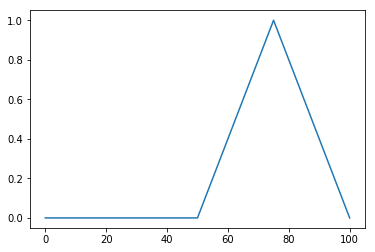

In [4]:
_ = plot(x, lagrange_basis(x, 3)(x))

In [5]:
from numpy.testing import *

assert_equal(lambda_function(linspace(0,1,3))(.25), 1.25)
assert_almost_equal(lambda_function(linspace(0,1,5))(.3), 1.2464, decimal=8)

NameError: name 'lambda_function' is not defined

Plot $\Lambda(q)(x)$ for equispaced nodes on the interval $[0,1]$ for 3, 5, and 7 equispaced nodes respectively. Comment the result.

In [ ]:
for i in (3, 5, 7):
    x = linspace(0, 1, i)
    fig, ax = subplots()
    _ = ax.plot(x, lagrange_basis(x, 2)(x))

YOUR ANSWER HERE

## Chebyshev Nodes

Chebyshev nodes are defined as:
$$
x_k = cos\left(\frac{2k-1}{2n} \pi \right), k = 1,\ldots,n.
$$
Write a function to evaluate then for a given $n$.


In [49]:
def chebyshev_nodes(n):
    return [cos(((2.*k - 1.) / (2 * n) * pi)) for k in range(1, n+1)]

In [ ]:
assert_almost_equal(chebyshev_nodes(5),[  9.51056516e-01, 5.87785252e-01,   6.12323400e-17,  -5.87785252e-01,
  -9.51056516e-01],decimal=8)
assert_almost_equal(chebyshev_nodes(7),[  9.74927912e-01,   7.81831482e-01,   4.33883739e-01,   6.12323400e-17,
  -4.33883739e-01,  -7.81831482e-01,  -9.74927912e-01],decimal=8)

Plot the location of chebyshev nodes on the unit circle, and on the orizontal axis.

 - plot the positive sector of a cirumference with center $0$ and radius $1$.
 - plot the location of chebicev points on the cirumference, suggested plot option is `'*'`.
 - plot projection lines from the circle center to chebyshev nodes projected on the circumference.
 - plot projection lines from chebyshev nodes projected on the circumference to chebyshev nodes on the horizontal axis.
 - plot chebyshev nodes, suggested plot option is `'o'`.
 - make sure the axis are such that the resulting plot is truly a circle...

[0.97492791218182362, 0.7818314824680298, 0.43388373911755818, 6.123233995736766e-17, -0.43388373911755806, -0.7818314824680298, -0.97492791218182362]
6.12323399574e-17
[0.82766143263604208, 0.70458026463905643, 0.42039783547646414, 6.123233995736766e-17, -0.42039783547646403, -0.70458026463905643, -0.82766143263604208]


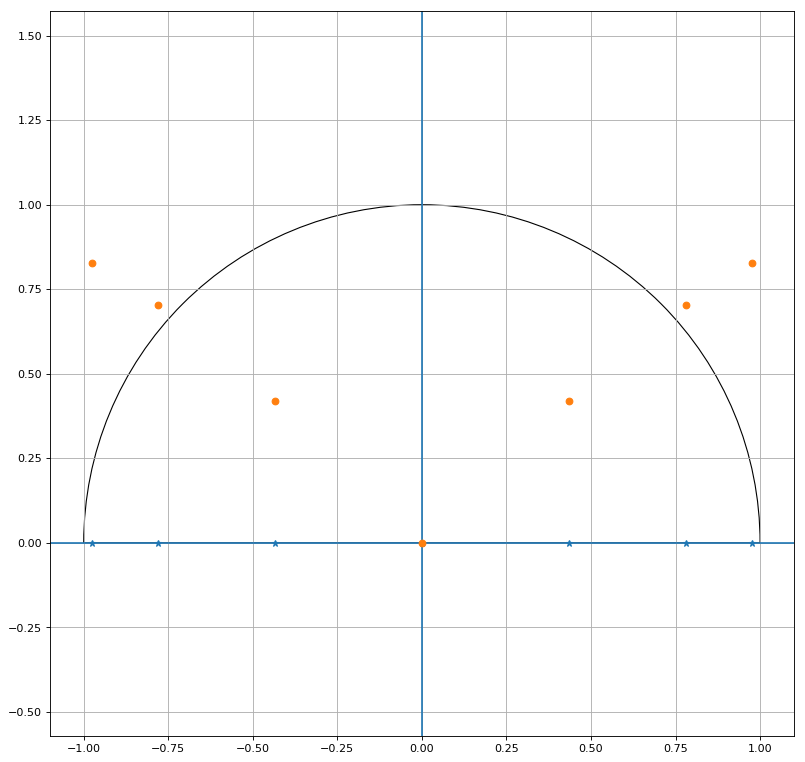

In [80]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

fig, ax = plt.subplots(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
ax.set_aspect(1)
ax.grid()
ax.axhline()
ax.axvline()

center = (0, 0)
radius = 1
theta1, theta2 = 0, 180
w = Wedge(center, radius, theta1, theta2, fc='k', fill=False)
ax.add_patch(w)

ch_nodes = chebyshev_nodes(7)
ax.plot(ch_nodes, zeros(len(ch_nodes)), "*")
ax.plot(ch_nodes, [abs(sin(n)) for n in ch_nodes], "o")
print(ch_nodes)
print(sin(6.123233995736766e-17))
print([sin(n) for n in ch_nodes])


ax.axis('equal')
plt.show()

Plot $\Lambda(q)(x)$ for chebyshev nodes on the interval $[x_0,x_n]$ for 3, 5, and 7 nodes respectively. Comment the result.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

Define a function `function_norm` that returns $||f(x)||\infty$ with $x\in[a,b]$ (default to $[0,1]$). To keep the implementation simple, evaluate the given function over $2^n+1$ points and return the maximum value. Any smarter and correct implementation is welcome. $n$ should be selectable at run time, and it should be by default equal to 20 (rhoughly a million points)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
print lambda_function(linspace(0,1,7))(.2)
print lambda_function(linspace(0,1,7))(linspace(0,1,2**2+1))
assert_almost_equal(function_norm(lambda_function(linspace(0,1,7)),0,1,10),4.54922445348, decimal=5)
assert_almost_equal(function_norm(lambda_function(linspace(0,1,5)),0,1,10),2.20780651848, decimal=5)

xi = chebyshev_nodes(7)
assert_almost_equal(function_norm(lambda_function(xi),xi[0],xi[-1]),1.78252988655, decimal=5)

xi = chebyshev_nodes(5)
assert_almost_equal(function_norm(lambda_function(xi),xi[0],xi[-1]),1.57016748842, decimal=5)

Evaluate the $||\Lambda(q)||_{\infty}$ for degree from 1 to 7, for equispaced points, and for chebyshev nodes. Store the corresponding values in two different arrays `norm_l_eq`, and `norm_l_ch`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert_almost_equal(norm_l_eq,[1.,1.,1.25,1.63113031,2.2078244,3.10630116,4.54934179], decimal=5)
assert_almost_equal(norm_l_ch,[1.,1.,1.25,1.42987272,1.57016749,1.68514046,1.78252989], decimal=5)

Plot the $||\Lambda(q,x)||_{\infty}$ for degree from 1 to 7, for equispaced points, and for chebyshev nodes.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Bernstein Basis
Write a function that returns the ith Bernstein Basis of order $n$, using the standard definition: 
$$
B_{i,n}(t) = \binom{n}{i} t^i(1-t)^{n-i}
$$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_polynomial(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Implement the recursive definition of the bernstein polynomial:
$$
B_{k,n}(t) = (1-t)\cdot B_{k,n-1}(t)+t\cdot B_{k-1,n-1}(t)
$$

 - if $k < 0\ \mathrm{or}\ i > n$ then $B_{k,n} = 0$. 
 - if $k = 0\ \mathrm{and}\ n =0$ then $B_{k,n} = 1$. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_recursive(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Implement power basis formula:
$$
B_{k,n}(t) = \sum_{i=k}^n(-1)^{i-k}\binom{n}{i}\binom{i}{k}t^i
$$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_power_basis(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Plot all basis obtained through the "definition" implementation and through the "power basis" implementation for n=20,40,80,100. Give an explanation for what you observe.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

Given the basis functions above, construct the Bernstein approximation of a continuous function, defined as:
$$
B_n(f)(t) := \sum_{i=0}^{n} B_{i,n} (t) * f(i/n) 
$$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
func = lambda t : sin(2*pi*t)
bi = bernstein_interpolation(3,func)
expected = [  0.00000000e+00,1.92450090e-01,-1.92450090e-01,-2.44929360e-16]
assert_almost_equal(bi(linspace(0,1,4)),expected,decimal=8)
bi = bernstein_interpolation(15,func)
expected = [  0.00000000e+00,6.50601790e-01,-6.50601790e-01,-2.44929360e-16]
assert_almost_equal(bi(linspace(0,1,4)),expected,decimal=8)

Test your implementation, plotting the bernstein interpolation of $\sin(2\pi x)$ for different degrees:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Given tolerance `tol` for the the function `func`, find the order $n$ that satisfies $\mathtt{tol}<||f(x)||_\infty$. Use the `function_norm` previously implemented.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
func = lambda t : sin(2*pi*t)
assert_equal(find_order_given_tolerance(func,.05),77)

h = lambda x: abs(x-.5)
assert_equal(find_order_given_tolerance(h,.05),64)

g = lambda x: 1/(1+(10*x-5)**2)
assert_equal(find_order_given_tolerance(g,.1),187)